In [5]:
import pyaudio
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
def pltplot(data):
    print(len(data))
    data = data[0:1000]
    plt.figure()
    x = range(len(data))
    plt.plot(x, data)
    plt.show()

In [9]:
#指定周波数でサイン波を生成する
def sine(frequency, length, rate):
    length = int(length * rate)
    factor = float(frequency) * (math.pi * 2) / rate
    #pltplot(numpy.sin(numpy.arange(length) * factor))
    return numpy.sin(numpy.arange(length) * factor)

In [4]:
#オーディオ鳴らす
def play_tone(stream, frequency=600, length=1, rate=44100):
    chunks = []
    chunks.append(sine(frequency, length, rate))
    chunk = numpy.concatenate(chunks) * 0.25
    stream.write(chunk.astype(numpy.float32).tostring())

44100


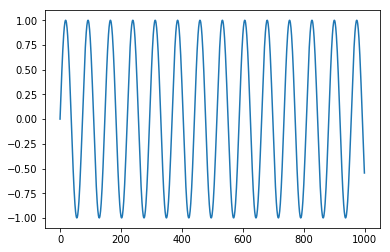

In [5]:
#main
if __name__ == '__main__':
    p = pyaudio.PyAudio()
    stream = p.open(format=pyaudio.paFloat32,
                    channels=1, rate=44100, output=1)
    play_tone(stream)
    stream.close()
    p.terminate()

In [18]:
# 定数の生成
key_name = ["C","D","E","F","G","A","B","C+"]
key_diff = [-9,-7,-5,-4,-2,0,2,3]
key_frequency = {}
for key,diff in zip(key_name,key_diff):
    key_frequency[key] = 440 * math.pow(2,diff * (1/12.0))

In [19]:
def chord(frequency, length, rate):
    # 音源生成
    src = []
    src.append(sine(frequency,length,rate))
    src.append(sine(frequency * math.pow(2,(4/12.0)),length,rate))
    src.append(sine(frequency * math.pow(2,(7/12.0)),length,rate))
    res = numpy.array([0] * len(src[0])) #ダミーの空配列

    #加算&クリッピング
    for s in src:
        res = res + s
        res *= 0.5

    return res

In [20]:
def play_chord(stream, frequency=440, length=1, rate=44100):
    chunks = []
    chunks.append(chord(frequency, length, rate))
    chunk = numpy.concatenate(chunks) * 0.25
    stream.write(chunk.astype(numpy.float32).tostring())

In [21]:
if __name__ == '__main__':
    p = pyaudio.PyAudio()
    stream = p.open(format=pyaudio.paFloat32, channels=1, rate=44100, output=1)
    for key in key_name:
        play_chord(stream,frequency=key_frequency[key])
    stream.close()
    p.terminate()

In [7]:
import numpy as np
import pyaudio
import matplotlib.pyplot as plt
from time import sleep

In [2]:
# オーディオプレーヤー
class play_sound:
        def __init__(self):
            self.p = pyaudio.PyAudio()
            self.stream = self.p.open(format=pyaudio.paFloat32, channels=2, rate=44100, output=1)
            self.level = -1
            self.playing = True

        def generate_tone(self, frequency, length, rate):
            length = int(length * rate)
            factor = float(frequency) * (np.pi * 2) / rate
            print(length, factor, length * factor / (np.pi))
            return np.sin(np.arange(length) * factor)

        def generate_tone_ver2(self, rate = 44100):
            freqs = (600 - self.level * 100) * np.ones(44100)
            #for adata in data:
            #    tmp = np.ones(1000)
            #    freqs.append((600+adata*10) * tmp)
            #freqs = np.concatenate(freqs)
            phazes_diff = 2 * np.pi * freqs / rate
            phazes = np.cumsum(phazes_diff)
            return np.sin(phazes)

        def play(self):
            while self.playing:
                chunks = []
                if self.level < 0:
                    sleep(1)
                    continue
                freq = 600 - self.level * 100
                chunks.append(self.generate_tone(freq, 0.5, 44100))
                #chunks.append(self.generate_tone_ver2())
                chunk = np.concatenate(chunks) * 0.1
                print(chunk[len(chunk)-1])
                self.stream.write(chunk.astype(np.float32).tostring())
                sleep(0.5)

            self.stream.close()
            self.p.terminate()

        def play_stereo(self):
            #while self.playing:
                chunks = np.empty(88200)
                low_sound = self.generate_tone(450, 1, 44100)
                high_sound = self.generate_tone(600, 1, 44100) 
                for i in range(44100):
                    chunks[i*2] = low_sound[i] * i/44100
                    chunks[i*2 + 1] = high_sound[i] * (1 - i/44100)
                print(chunks.shape)
                self.stream.write(chunks.astype(np.float32).tostring())
                sleep(0.5)

            #self.stream.close()
            #self.p.terminate()

In [2]:
ps = play_sound()
ps.play_stereo()
ps.stream.close()
ps.p.terminate()

NameError: name 'play_sound' is not defined

In [3]:
#　波鳴らすだけ
class play_wave:
        def __init__(self):
            self.p = pyaudio.PyAudio()
            self.stream = self.p.open(format=pyaudio.paFloat32, channels=1, rate=44100, output=1)
        def close(self):
            self.stream.close()
            self.p.terminate()
        def play(self, signal):
            #signal = np.tile(signal, 10) * 0.1
            signal *= 0.1
            #print(signal.shape)
            self.stream.write(signal.astype(np.float32).tostring())

(4096,)


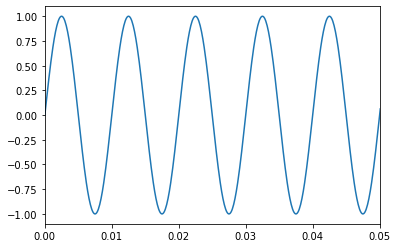

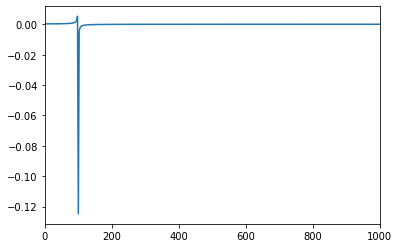

(1.141616263785353e-05-0.0009496340488653177j)


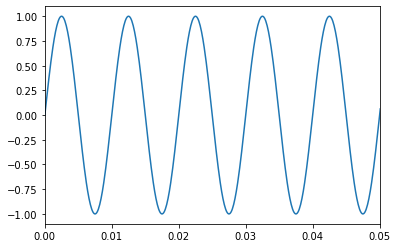

In [11]:
N = 4096
dt = 0.0001
t = np.arange(0, N * dt, dt)
freq = np.linspace(0, 1.0 / dt, N)
omega = 2 * np.pi * 100
fn = 1 / dt / 2

s1 = 1 * np.sin(omega * t) #+ 0.8 * np.cos(2 * omega * t)
print(s1.shape)
plt.figure()
plt.plot(t, s1)
plt.xlim(0,0.05)
plt.show()

pw = play_wave()
pw.play(s1)
pw.close()

y = np.fft.fft(s1) / (N / 2)
plt.figure()
plt.plot(freq, y)
plt.xlim(0,1000)
plt.show()
print(y[100])

#y[300] = 0.6

s2 = np.fft.ifft(y) * N / 2
plt.figure()
plt.plot(t, s2)
plt.xlim(0,0.05)
plt.show()

pw = play_wave()
pw.play(s2.real)
pw.close()

In [69]:
class ifft_to_sound:
    def __init__(self):
        self.pw = play_wave()
        self.data = np.zeros([4096])
        return
    def set_data(self,freq,level=1):
        self.data[freq] = level
        return
    def play(self):
        result = np.fft.ifft(self.data) * 4096 / 2
        #plt.figure()
        #plt.plot(np.arange(result.shape[0]),result)
        #plt.show()
        self.pw.play(result.real)
        return
    def reset_data(self):
        self.data = np.zeros([4096])
        return
    def close(self):
        self.pw.close()

In [72]:
its = ifft_to_sound()
for i in range(10):
    its.set_data(40 + 5 * i)
    its.play()
    its.reset_data()
its.close()

In [22]:
def waon(nums, levels):
    result = np.zeros(44100)
    for n, l in zip(nums, levels):
        result += sine(440 * (2 ** (1/12)) ** n , 1, 44100) * l
    return result

def waon_troll(nums, levels):
    result = np.zeros(44100)
    for i, (n, l) in enumerate(zip(nums, levels)):
        s = 44100 - int(44100 * (1-0.1*i))
        result[s: ] += sine(440 * (2 ** (1/12)) ** n , 1 - 0.1*i, 44100) * l
    return result

pw = play_wave()
#s = np.sin(2 * np.pi * 200 * np.arange(0,4.096,0.0001))
s = waon([0,4,7,11], [1,1,1,1])
s = waon_troll([0,4,7], [1,1,1])
s = waon_troll([2,6,9,14], [1,1,1,1])
#s = waon_troll([4,8,11,16], [1,1,1,1])
#s = waon_troll([0,4,7,12,16,19,24], [1,1,1,1,1,1,1])
pw.play(s)
pw.close()